<a href="https://colab.research.google.com/github/juliantsang1/capstone/blob/main/ensemble/Ensemble_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
from stage_1_ensemble import run_ensemble_stage_1

In [3]:
from stage_2_ensemble import run_ensemble_stage_2

In [8]:
d = run_ensemble_stage_2()

In [9]:
d

image_group_id                     top_pred_3  \
0     SSWI000000019125218          {'wolf': 0.417687804}   
1     SSWI000000020163117          {'deer': 0.843827784}   
2     SSWI000000016424935                {'blank': 0.99}   
3     SSWI000000017050425        {'coyote': 0.818263948}   
4     SSWI000000019521970          {'bear': 0.798027337}   
...                   ...                            ...   
1649  SSWI000000016457740       {'raccoon': 0.798470438}   
1650  SSWI000000021871855  {'turkey': 0.811833381652832}   
1651  SSWI000000010713826       {'raccoon': 0.483470738}   
1652  SSWI000000021029319        {'coyote': 0.279210627}   
1653  SSWI000000017971379           {'coyote': 0.903687}   

                                            top3_dict_3  \
0              {'blank': '0.99', 'wolf': '0.417687804'}   
1                               {'deer': '0.843827784'}   
2                                     {'blank': '0.99'}   
3     {'foxgray_foxred': '0.4190373122692108', 'coyo...   
4                               {'bear': '0.798027337'}   
...                                                 ...   
1649        {'blank': '0.99', 'raccoon': '0.798470438'}   
1650  {'elk': '0.7724112272262573', 'turkey': '0.811...   
1651        {'blank': '0.99', 'raccoon': '0.483470738'}   
1652  {'blank': '0.99', 'coyote': '0.279210627', 'wo...   
1653                             {'coyote': '0.903687'}   

                           top_pred_4  \
0      {'coyote': 0.9717527627944946}   
1        {'deer': 0.9996293783187866}   
2     {'raccoon': 0.8871060609817505}   
3      {'coyote': 0.7204996943473816}   
4        {'bear': 0.9269823431968689}   
...                               ...   
1649  {'raccoon': 0.9442254304885864}   
1650  {'raccoon': 0.6286075115203857}   
1651   {'coyote': 0.5813747048377991}   
1652      {'wolf': 0.875231921672821}   
1653   {'coyote': 0.9946677684783936}   

                                            top3_dict_4  \
0     {'coyote': '0.9717527627944946', 'deer': '0.05...   
1     {'deer': '0.9996293783187866', 'foxgray_foxred...   
2     {'raccoon': '0.8871060609817505', 'foxgray_fox...   
3     {'wolf': '0.6602926850318909', 'coyote': '0.72...   
4     {'bear': '0.9269823431968689', 'coyote': '0.07...   
...                                                 ...   
1649  {'raccoon': '0.9442254304885864', 'coyote': '0...   
1650  {'raccoon': '0.6286075115203857', 'wolf': '0.5...   
1651  {'coyote': '0.5813747048377991', 'opossum': '0...   
1652  {'wolf': '0.875231921672821', 'coyote': '0.206...   
1653  {'coyote': '0.9946677684783936', 'wolf': '0.03...   

                                     topk_conf_3_scaled  \
0                 {'blank': 0.99, 'wolf': 0.5012253648}   
1                                        {'deer': 0.99}   
2                                       {'blank': 0.99}   
3     {'foxgray_foxred': 0.502844774723053, 'coyote'...   
4                          {'bear': 0.9576328043999999}   
...                                                 ...   
1649     {'blank': 0.99, 'raccoon': 0.9581645255999999}   
1650  {'elk': 0.9268934726715088, 'turkey': 0.974200...   
1651           {'blank': 0.99, 'raccoon': 0.5801648856}   
1652  {'blank': 0.99, 'coyote': 0.3350527524, 'wolf'...   
1653                                   {'coyote': 0.99}   

                                     topk_conf_4_scaled  \
0     {'coyote': 0.8097939689954122, 'deer': 0.04221...   
1     {'deer': 0.8330244819323223, 'foxgray_foxred':...   
2     {'raccoon': 0.7392550508181255, 'foxgray_foxre...   
3     {'wolf': 0.5502439041932424, 'coyote': 0.60041...   
4     {'bear': 0.7724852859973907, 'coyote': 0.06055...   
...                                                 ...   
1649  {'raccoon': 0.7868545254071554, 'coyote': 0.06...   
1650  {'raccoon': 0.5238395929336548, 'wolf': 0.4807...   
1651  {'coyote': 0.4844789206981659, 'opossum': 0.29...   
1652  {'wolf': 0.729359934727351, 'coyote': 0.172033...   
1653  {'coyote': 0.82

In [6]:
full_ensemble = pd.merge(run_ensemble_stage_1(), run_ensemble_stage_2(),
         on = 'image_group_id')

full_ensemble = full_ensemble.rename(columns={'ensemble_pred': 'blank',
                             'event_final_pred': 'species'})

full_ensemble['blank'] = full_ensemble['blank'].apply(lambda x: True if x == 'blank' else False)

### load test data

In [2]:
#test_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/w210_capstone/yolo_splits_3/yolo_splits3/test/test_labels.csv')
test_data = pd.read_csv('../data/test_labels4-1.csv')
test_data[test_data.TRIGGER_ID == 'SSWI000000013549996']

Unnamed: 0           TRIGGER_ID CLASS_SPECIES  Total  \
224         224  SSWI000000013549996          Wolf      1   

    CLASS_SPECIES_RESTATED  
224                   wolf

In [3]:
#YOLO Species Logic
# Species
#
# Events with multiple images of same class will be labeled the majority class
#   For event to be labeled Blank, all images must be blank
# Events with all different labels will get labelled with highest confidence score
#
#Counts
# Events with multiple images of same class- we will take the max of the majority class
# Events with all different labels will get labelled with the count of highest conf score label

"""
output:
event level: event_id, species class name, count, bounding boxes, top3 dict (species name: confidence)
scale yolo top1 by 1.5x
"""

'\noutput:\nevent level: event_id, species class name, count, bounding boxes, top3 dict (species name: confidence)\nscale yolo top1 by 1.5x\n'

In [4]:
"""
output: format:

  { event_id: ######
      {
        species_class: 0
        species_name: deer
        count: 1
        bbox: [
          [x, y, w, h]
        ]
        conf: 0.79
        top3: {
          deer: 0.79,
          elk: 0.4
          fox: 0.1
        }
      }

  }
"""

'\noutput: format:\n\n  { event_id: ######\n      {\n        species_class: 0\n        species_name: deer\n        count: 1\n        bbox: [\n          [x, y, w, h]\n        ]\n        conf: 0.79\n        top3: {\n          deer: 0.79,\n          elk: 0.4\n          fox: 0.1\n        }\n      }\n\n  }\n'

## Full Evaluation

In [2]:
sample_input = pd.read_csv('../results/model_output.csv', sep=';')

In [3]:
sample_input

Unnamed: 0  model_output_id  model_id       image_group_id image_id_1  \
0              0             5001         5  SSWI000000019125218          C   
1              1             5002         5  SSWI000000020163117          C   
2              2             5003         5  SSWI000000016424935          C   
3              3             5004         5  SSWI000000017050425          B   
4              4             5005         5  SSWI000000019521970          B   
...          ...              ...       ...                  ...        ...   
3607        3607             3700         3  SSWI000000016457740          A   
3608        3608             3701         3  SSWI000000021871855          B   
3609        3609             3702         3  SSWI000000010713826          B   
3610        3610             3703         3  SSWI000000021029319          C   
3611        3611             3704         3  SSWI000000017971379          B   

     image_id_1_species_name                        image_id_1_conf  \
0                        NaN                                    NaN   
1                        NaN                                    NaN   
2                        NaN                                    NaN   
3                        NaN                                    NaN   
4                        NaN                                    NaN   
...                      ...                                    ...   
3607          foxgray_foxred                     0.6659418344497681   
3608           turkey,turkey  0.8208842277526855,0.8478100299835205   
3609                     NaN                                    NaN   
3610          foxgray_foxred                     0.2961553931236267   
3611          foxgray_foxred                     0.9094932675361633   

      image_id_1_count  image_id_1_blank  image_id_1_detectable  ...  \
0                    0              True                  False  ...   
1                    1             False                  False  ...   
2                    0              True                  False  ...   
3                    1             False                  False  ...   
4                    1             False                  False  ...   
...                ...               ...                    ...  ...   
3607                 1             False                  False  ...   
3608                 2             False                  False  ...   
3609                 0              True                  False  ...   
3610                 1             False                  False  ...   
3611                 1             False                  False  ...   

     image_id_3 image_id_3_species_name  \
0             B                     NaN   
1             A                     NaN   
2             B                     NaN   
3             C                     NaN   
4             A                     NaN   
...         ...                     ...   
3607          C                     NaN   
3608          C      bear,turkey,turkey   
3609          C                     NaN   
3610          A          foxgray_foxred   
3611          A          foxgray_foxred   

                                        image_id_3_conf  image_id_3_count  \
0                                                   NaN                 0   
1                                                   NaN                 1   
2                                                   NaN                 0   
3                                                   NaN                 1   
4                                                   NaN                 1   
...                                                 ...               ...   
3607                                                NaN                 0   
3608  0.33224594593048096,0.7594556212425232,0.83460...                 3   
3609                                                NaN                 0   
3610                                 0.6708976626396

In [6]:
df_model_id3 = sample_input[sample_input.model_id == 3]
df_model_id4 = sample_input[sample_input.model_id == 4]

In [7]:
def create_species_conf_dict(x, y):
  if isinstance(x, float):
    pass
  else:
    species_list = list(x.split(","))
    conf_list = list(y.split(","))
    return dict(zip(species_list, conf_list))


def merge_species_conf_dict_top3(x, y, z):
  if x is None:
    x = {'None': 0}
  if y is None:
    y = {'None': 0}
  if z is None:
    z = {'None': 0}

  dict_list = [list(x.items())[0],list(y.items())[0],list(z.items())[0]]
  #print(dict_list)
  preds_dict = {}

  for item in dict_list:
    if item is None:
      pass
    else:
      if item[0] in preds_dict:
        preds_dict[item[0]].append(float(item[1]))
      else:
        preds_dict[item[0]] = [float(item[1])]

      
  return preds_dict

def get_topk(x, k):
  topk_event_dict = {}
  top_ind = sorted(x, key=x.get, reverse=True)[:k]
  conf_scores = {}
  for i in top_ind:
    conf_scores[i] = max(x[i])
  
  return conf_scores

def get_pred_from_top3(consol_dict):

  ## if all 3 predictions are different classes, defer to class with highest confidence
  if len(consol_dict) == 3:
    return get_topk(consol_dict, 1)

  ## if there is an even number of predictions (2), defer to class with more appearances (has a longer list)
  elif len(consol_dict) == 2:
    max_key = max(consol_dict, key= lambda x: len(set(consol_dict[x])))
    return {max_key: max(consol_dict[max_key])}
  
  ## if there is only one class of predictions, return the class with highest confidence
  else:
    return get_topk(consol_dict, 1)

def merge_species_conf_dict(x, y, z):
  dict_list = [x,y,z]
  #print(dict_list)
  preds_dict = {}

  for item in dict_list:
    if item is None:
      pass
    else:
      for key, value in item.items():
        if key in preds_dict:
          preds_dict[key].append(value)
        else:
          preds_dict[key] = [value]
      
  return preds_dict



df_model_id3['img1_species_conf_dict'] = df_model_id3.apply(lambda x: create_species_conf_dict(x.image_id_1_species_name, x.image_id_1_conf), axis=1)
df_model_id3['img2_species_conf_dict'] = df_model_id3.apply(lambda x: create_species_conf_dict(x.image_id_2_species_name, x.image_id_2_conf), axis=1)
df_model_id3['img3_species_conf_dict'] = df_model_id3.apply(lambda x: create_species_conf_dict(x.image_id_3_species_name, x.image_id_3_conf), axis=1)

df_model_id4['img1_species_conf_dict'] = df_model_id4.apply(lambda x: create_species_conf_dict(x.image_id_1_species_name, x.image_id_1_conf), axis=1)
df_model_id4['img2_species_conf_dict'] = df_model_id4.apply(lambda x: create_species_conf_dict(x.image_id_2_species_name, x.image_id_2_conf), axis=1)
df_model_id4['img3_species_conf_dict'] = df_model_id4.apply(lambda x: create_species_conf_dict(x.image_id_3_species_name, x.image_id_3_conf), axis=1)


df_model_id3['consol_dict'] = df_model_id3.apply(lambda x: merge_species_conf_dict_top3(x.img1_species_conf_dict, x.img2_species_conf_dict, x.img3_species_conf_dict), axis=1)
df_model_id4['consol_dict'] = df_model_id4.apply(lambda x: merge_species_conf_dict_top3(x.img1_species_conf_dict, x.img2_species_conf_dict, x.img3_species_conf_dict), axis=1)

df_model_id3['top_pred'] = df_model_id3.apply(lambda x: get_pred_from_top3(x.consol_dict), axis=1)
df_model_id4['top_pred'] = df_model_id4.apply(lambda x: get_pred_from_top3(x.consol_dict), axis=1)

df_model_id3['top3_dict'] = df_model_id3.apply(lambda x: get_topk(merge_species_conf_dict(x.img1_species_conf_dict, x.img2_species_conf_dict, x.img3_species_conf_dict),3), axis=1)
df_model_id4['top3_dict'] = df_model_id4.apply(lambda x: get_topk(merge_species_conf_dict(x.img1_species_conf_dict, x.img2_species_conf_dict, x.img3_species_conf_dict),3), axis=1)

In [8]:
"""
merge model_id3 and model_id4 at the event level
the final prediction dictionaries from both models can be on the same row
"""
df_merge = pd.merge(df_model_id3, df_model_id4, how='inner', on="image_group_id", suffixes=('_3', '_4'))
df_merge = df_merge[['image_group_id', 'top_pred_3', 'top3_dict_3', 'top_pred_4', 'top3_dict_4']]
df_merge

image_group_id                                        top_pred_3  \
0     SSWI000000019158997                                     {'None': 0.0}   
1     SSWI000000012863544                                     {'None': 0.0}   
2     SSWI000000015060930                                     {'None': 0.0}   
3     SSWI000000020163661  {'cottontail_snowshoehare': 0.41720232367515564}   
4     SSWI000000013549996                      {'deer': 0.8169369697570801}   
...                   ...                                               ...   
1199  SSWI000000016457740            {'foxgray_foxred': 0.6659418344497681}   
1200  SSWI000000021871855                     {'turkey': 0.856519877910614}   
1201  SSWI000000010713826                                     {'None': 0.0}   
1202  SSWI000000021029319            {'foxgray_foxred': 0.6708976626396179}   
1203  SSWI000000017971379            {'foxgray_foxred': 0.9094932675361633}   

                                            top3_dict_3  \
0                                                    {}   
1                                                    {}   
2                        {'bear': '0.5193208456039429'}   
3     {'cottontail_snowshoehare': '0.417202323675155...   
4     {'coyote': '0.8594738841056824', 'deer': '0.81...   
...                                                 ...   
1199           {'foxgray_foxred': '0.6659418344497681'}   
1200  {'turkey': '0.856519877910614', 'bear': '0.332...   
1201                                                 {}   
1202           {'foxgray_foxred': '0.6708976626396179'}   
1203           {'foxgray_foxred': '0.9094932675361633'}   

                                           top_pred_4  \
0     {'cottontail_snowshoehare': 0.6963155269622803}   
1                      {'turkey': 0.8526954650878906}   
2              {'foxgray_foxred': 0.2720596492290497}   
3                      {'turkey': 0.8804661631584167}   
4                        {'wolf': 0.9886847138404846}   
...                                               ...   
1199           {'foxgray_foxred': 0.4122227132320404}   
1200                     {'wolf': 0.9921602606773376}   
1201                  {'coyote': 0.37424376606941223}   
1202                     {'wolf': 0.9442877769470215}   
1203                      {'wolf': 0.997535228729248}   

                                            top3_dict_4  
0     {'cottontail_snowshoehare': '0.696315526962280...  
1     {'turkey': '0.8526954650878906', 'wolf': '0.12...  
2     {'elk': '0.4370231628417969', 'deer': '0.28611...  
3     {'turkey': '0.8804661631584167', 'wolf': '0.09...  
4     {'wolf': '0.9886847138404846', 'coyote': '0.03...  
...                                                 ...  
1199  {'opossum': '0.3002755045890808', 'raccoon': '...  
1200  {'wolf': '0.9921602606773376', 'raccoon': '0.0...  
1201  {'coyote': '0.37424376606941223', 'opossum': '...  
1202  {'wolf': '0.9442877769470215', 'bear': '0.0710...  
1203  {'wolf': '0.997535228729248', 'coyote': '0.099...  

[1204 rows x 5 columns]

In [9]:
"""
before we combine scores, we should weight the predictions between model_id3 and model_id4
to slightly bias the scores towards model_id3

80/67 = 1.2

multiply topk_conf_3 by 1.2
divide topk_conf_4 by 1.2
"""

def scale_model_id3(x):
  ## x is a dictionary
  intermed_dict = {key: float(value) * 1.2 for key, value in x.items()}
  ## cap maximum possible score at 0.99
  output_dict = {key: (0.99 if float(value) > 1 else float(value)) for key, value in intermed_dict.items()}
  return output_dict

def scale_model_id4(x):
  ## x is a dictionary
  return {key: float(value) / 1.2 for key, value in x.items()}

df_merge['topk_conf_3_scaled'] = df_merge.apply(lambda x: scale_model_id3(x.top3_dict_3), axis=1)
df_merge['topk_conf_4_scaled'] = df_merge.apply(lambda x: scale_model_id4(x.top3_dict_4), axis=1)

In [10]:
"""
output final topk dictionary of species predictions and their confidence scores
"""

def combine_topk_conf(x, y):
  dict_list = [x,y]
  #print(dict_list)
  preds_dict = {}

  for item in dict_list:
    if item is None:
      pass
    else:
      for key, value in item.items():
        if key in preds_dict:
          preds_dict[key].append(value)
        else:
          preds_dict[key] = [value]
      
  return preds_dict

def get_final_topk(x, k):
  topk_event_dict = {}
  top_ind = sorted(x, key=x.get, reverse=True)[:k]
  conf_scores = {}
  for i in top_ind:
    conf_scores[i] = max(x[i])
  
  return conf_scores

"""
output final event prediction, conf score
"""
def output_final_pred_species(x):
  if not x:
    return None
  else:
    intermed_dict = {key: float(value) for key, value in x.items()}
    top_ind = sorted(intermed_dict, key=intermed_dict.get, reverse=True)[:1]
    #print(top_ind)
    return top_ind[0]

def output_final_pred_conf(x):
  if not x:
    return None
  else:
    intermed_dict = {key: float(value) for key, value in x.items()}
    top_ind = sorted(intermed_dict, key=intermed_dict.get, reverse=True)[:1]
    #print(top_ind)
    return x[top_ind[0]]

df_merge['event_final_topk_conf'] = df_merge.apply(lambda x: get_final_topk(combine_topk_conf(x.topk_conf_3_scaled, x.topk_conf_4_scaled),3), axis=1)
df_merge['event_final_pred'] = df_merge.apply(lambda x: output_final_pred_species(x.event_final_topk_conf), axis=1)
df_merge['event_final_pred_conf'] = df_merge.apply(lambda x: output_final_pred_conf(x.event_final_topk_conf), axis=1)
df_merge

image_group_id                                        top_pred_3  \
0     SSWI000000019158997                                     {'None': 0.0}   
1     SSWI000000012863544                                     {'None': 0.0}   
2     SSWI000000015060930                                     {'None': 0.0}   
3     SSWI000000020163661  {'cottontail_snowshoehare': 0.41720232367515564}   
4     SSWI000000013549996                      {'deer': 0.8169369697570801}   
...                   ...                                               ...   
1199  SSWI000000016457740            {'foxgray_foxred': 0.6659418344497681}   
1200  SSWI000000021871855                     {'turkey': 0.856519877910614}   
1201  SSWI000000010713826                                     {'None': 0.0}   
1202  SSWI000000021029319            {'foxgray_foxred': 0.6708976626396179}   
1203  SSWI000000017971379            {'foxgray_foxred': 0.9094932675361633}   

                                            top3_dict_3  \
0                                                    {}   
1                                                    {}   
2                        {'bear': '0.5193208456039429'}   
3     {'cottontail_snowshoehare': '0.417202323675155...   
4     {'coyote': '0.8594738841056824', 'deer': '0.81...   
...                                                 ...   
1199           {'foxgray_foxred': '0.6659418344497681'}   
1200  {'turkey': '0.856519877910614', 'bear': '0.332...   
1201                                                 {}   
1202           {'foxgray_foxred': '0.6708976626396179'}   
1203           {'foxgray_foxred': '0.9094932675361633'}   

                                           top_pred_4  \
0     {'cottontail_snowshoehare': 0.6963155269622803}   
1                      {'turkey': 0.8526954650878906}   
2              {'foxgray_foxred': 0.2720596492290497}   
3                      {'turkey': 0.8804661631584167}   
4                        {'wolf': 0.9886847138404846}   
...                                               ...   
1199           {'foxgray_foxred': 0.4122227132320404}   
1200                     {'wolf': 0.9921602606773376}   
1201                  {'coyote': 0.37424376606941223}   
1202                     {'wolf': 0.9442877769470215}   
1203                      {'wolf': 0.997535228729248}   

                                            top3_dict_4  \
0     {'cottontail_snowshoehare': '0.696315526962280...   
1     {'turkey': '0.8526954650878906', 'wolf': '0.12...   
2     {'elk': '0.4370231628417969', 'deer': '0.28611...   
3     {'turkey': '0.8804661631584167', 'wolf': '0.09...   
4     {'wolf': '0.9886847138404846', 'coyote': '0.03...   
...                                                 ...   
1199  {'opossum': '0.3002755045890808', 'raccoon': '...   
1200  {'wolf': '0.9921602606773376', 'raccoon': '0.0...   
1201  {'coyote': '0.37424376606941223', 'opossum': '...   
1202  {'wolf': '0.9442877769470215', 'bear': '0.0710...   
1203  {'wolf': '0.997535228729248', 'coyote': '0.099...   

                                     topk_conf_3_scaled  \
0                                                    {}   
1                                                    {}   
2                          {'bear': 0.6231850147247314}   
3     {'cottontail_snowshoehare': 0.5006427884101867...   
4          {'coyote': 0.99, 'deer': 0.9803243637084961}   
...                                                 ...   
1199             {'foxgray_foxred': 0.7991302013397217}   
1200       {'turkey': 0.99, 'bear': 0.3986951351165771}   
1201                                                 {}   
1202             {'foxgray_foxred': 0.8050771951675415}   
1203                           {'foxgray_foxred': 0.99}   

                                     topk_conf_4_scaled  \
0     {'cottontail_snowshoehare': 0.5802629391352336...   
1     {'turkey': 0.7105795542399089, 'wolf': 0.10510...   
2     {'elk': 0.36418596903483075, 'deer': 0.2384258...   
3     {'turkey

In [11]:
df_merge[df_merge.event_final_topk_conf == {}]

image_group_id     top_pred_3 top3_dict_3     top_pred_4  \
82    SSWI000000005175003  {'None': 0.0}          {}  {'None': 0.0}   
84    SSWI000000019632734  {'None': 0.0}          {}  {'None': 0.0}   
113   SSWI000000009518903  {'None': 0.0}          {}  {'None': 0.0}   
117   SSWI000000015508841  {'None': 0.0}          {}  {'None': 0.0}   
132   SSWI000000009518996  {'None': 0.0}          {}  {'None': 0.0}   
195   SSWI000000006064953  {'None': 0.0}          {}  {'None': 0.0}   
313   SSWI000000019306133  {'None': 0.0}          {}  {'None': 0.0}   
350   SSWI000000017236064  {'None': 0.0}          {}  {'None': 0.0}   
420   SSWI000000020473641  {'None': 0.0}          {}  {'None': 0.0}   
493   SSWI000000021273639  {'None': 0.0}          {}  {'None': 0.0}   
550   SSWI000000021540572  {'None': 0.0}          {}  {'None': 0.0}   
574   SSWI000000020300891  {'None': 0.0}          {}  {'None': 0.0}   
596   SSWI000000019113024  {'None': 0.0}          {}  {'None': 0.0}   
651   SSWI000000017539373  {'None': 0.0}          {}  {'None': 0.0}   
657   SSWI000000010936171  {'None': 0.0}          {}  {'None': 0.0}   
667   SSWI000000013424924  {'None': 0.0}          {}  {'None': 0.0}   
768   SSWI000000016011626  {'None': 0.0}          {}  {'None': 0.0}   
877   SSWI000000020300887  {'None': 0.0}          {}  {'None': 0.0}   
980   SSWI000000020473592  {'None': 0.0}          {}  {'None': 0.0}   
1033  SSWI000000002741773  {'None': 0.0}          {}  {'None': 0.0}   
1094  SSWI000000011808173  {'None': 0.0}          {}  {'None': 0.0}   
1105  SSWI000000015442293  {'None': 0.0}          {}  {'None': 0.0}   
1184  SSWI000000014536251  {'None': 0.0}          {}  {'None': 0.0}   

     top3_dict_4 topk_conf_3_scaled topk_conf_4_scaled event_final_topk_conf  \
82            {}                 {}                 {}                    {}   
84            {}                 {}                 {}                    {}   
113           {}                 {}                 {}                    {}   
117           {}                 {}                 {}                    {}   
132           {}                 {}                 {}                    {}   
195           {}                 {}                 {}                    {}   
313           {}                 {}                 {}                    {}   
350           {}                 {}                 {}                    {}   
420           {}                 {}                 {}                    {}   
493           {}                 {}                 {}                    {}   
550           {}                 {}                 {}                    {}   
574           {}                 {}                 {}                    {}   
596           {}                 {}                 {}                    {}   
651           {}                 {}                 {}                    {}   
657           {}                 {}                 {}                    {}   
667           {}                 {}                 {}                    {}   
768           {}                 {}                 {}                    {}   
877           {}                 {}                 {}                    {}   
980           {}                 {}                 {}                    {}   
1033          {}                 {}                 {}                    {}   
1094          {}                 {}                 {}                    {}   
1105          {}                 {}                 {}                    {}   
1184          {}                 {}                 {}                    {}   

     event_final_pred  event_final_pred_conf  
82               None                    NaN  
84               None                    NaN  
113              None                    NaN  
117              None                    NaN  
132              None                    NaN  
195              None                    NaN  
313              None                    NaN  
350      

### Compare Against Test True Labels

In [13]:
test_data = pd.read_csv('../data/test_labels4-1.csv')
test_data = test_data[test_data.CLASS_SPECIES_RESTATED != "other"]
test_data.head()

Unnamed: 0           TRIGGER_ID CLASS_SPECIES  Total CLASS_SPECIES_RESTATED
1           1  SSWI000000004032002     Fox, Gray      1         foxgray_foxred
2           2  SSWI000000004068822     Fox, Gray      1         foxgray_foxred
3           3  SSWI000000004248668       Raccoon      1                raccoon
4           4  SSWI000000004277676     Fox, Gray      1         foxgray_foxred
5           5  SSWI000000004277809     Fox, Gray      1         foxgray_foxred

In [14]:
comparison_df = pd.merge(df_merge, test_data, how = "inner", left_on='image_group_id', right_on="TRIGGER_ID")
comparison_df.head()

image_group_id                                        top_pred_3  \
0  SSWI000000019158997                                     {'None': 0.0}   
1  SSWI000000012863544                                     {'None': 0.0}   
2  SSWI000000015060930                                     {'None': 0.0}   
3  SSWI000000020163661  {'cottontail_snowshoehare': 0.41720232367515564}   
4  SSWI000000013549996                      {'deer': 0.8169369697570801}   

                                         top3_dict_3  \
0                                                 {}   
1                                                 {}   
2                     {'bear': '0.5193208456039429'}   
3  {'cottontail_snowshoehare': '0.417202323675155...   
4  {'coyote': '0.8594738841056824', 'deer': '0.81...   

                                        top_pred_4  \
0  {'cottontail_snowshoehare': 0.6963155269622803}   
1                   {'turkey': 0.8526954650878906}   
2           {'foxgray_foxred': 0.2720596492290497}   
3                   {'turkey': 0.8804661631584167}   
4                     {'wolf': 0.9886847138404846}   

                                         top3_dict_4  \
0  {'cottontail_snowshoehare': '0.696315526962280...   
1  {'turkey': '0.8526954650878906', 'wolf': '0.12...   
2  {'elk': '0.4370231628417969', 'deer': '0.28611...   
3  {'turkey': '0.8804661631584167', 'wolf': '0.09...   
4  {'wolf': '0.9886847138404846', 'coyote': '0.03...   

                                  topk_conf_3_scaled  \
0                                                 {}   
1                                                 {}   
2                       {'bear': 0.6231850147247314}   
3  {'cottontail_snowshoehare': 0.5006427884101867...   
4       {'coyote': 0.99, 'deer': 0.9803243637084961}   

                                  topk_conf_4_scaled  \
0  {'cottontail_snowshoehare': 0.5802629391352336...   
1  {'turkey': 0.7105795542399089, 'wolf': 0.10510...   
2  {'elk': 0.36418596903483075, 'deer': 0.2384258...   
3  {'turkey': 0.733721802632014, 'wolf': 0.076691...   
4  {'wolf': 0.8239039282004039, 'coyote': 0.03056...   

                               event_final_topk_conf         event_final_pred  \
0  {'cottontail_snowshoehare': 0.5802629391352336...  cottontail_snowshoehare   
1  {'turkey': 0.7105795542399089, 'wolf': 0.10510...                   turkey   
2  {'bear': 0.6231850147247314, 'elk': 0.36418596...                     bear   
3  {'turkey': 0.733721802632014, 'cottontail_snow...                   turkey   
4  {'coyote': 0.99, 'deer': 0.9803243637084961, '...                   coyote   

   event_final_pred_conf  Unnamed: 0           TRIGGER_ID  CLASS_SPECIES  \
0               0.580263         701  SSWI000000019158997  Snowshoe Hare   
1               0.710580         200  SSWI000000012863544         Turkey   
2               0.623185         282  SSWI000000015060930            Elk   
3               0.733722         986  SSWI000000020163661           Deer   
4               0.990000         224  SSWI000000013549996           Wolf   

   Total   CLASS_SPECIES_RESTATED  
0      1  cottontail_snowshoehare  
1      1                   turkey  
2      1                      elk  
3      1                     deer  
4      1                     wolf

In [15]:
test_actuals = comparison_df['CLASS_SPECIES_RESTATED'].values
test_preds = comparison_df['event_final_pred'].values

In [16]:
from sklearn.metrics import confusion_matrix
class_names = ['bear',
 'cottontail_snowshoehare',
 'coyote',
 'deer',
 'elk',
 'foxgray_foxred',
 'opossum',
 'raccoon',
 'turkey',
 'wolf']
confusion_matrix(test_actuals, test_preds, labels=class_names)

array([[119,   0,   0,   0,   6,   1,   1,   0,   0,   3],
       [  2,  74,   2,   1,   0,  16,   1,   5,   3,  17],
       [  3,   3,  20,   2,   0,  46,   1,   2,  10,  48],
       [ 16,   3,  12,  63,   2,   7,   2,   2,  16,  68],
       [ 13,   2,   3,  22,  52,   1,   1,   0,   2,  27],
       [  0,   2,   4,   0,   0,  54,   1,   2,   0,   7],
       [  1,   8,   0,   0,   0,   5,  29,   1,   0,   8],
       [ 12,  14,   1,   0,   0,   9,  16,  44,   2,  21],
       [  7,   3,   1,   1,   0,   3,   0,   0,  48,  11],
       [  4,   0,   9,   4,   0,  16,   0,   0,   1,  92]])

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_actuals, test_preds, digits = 4))

                         precision    recall  f1-score   support

                   bear     0.6723    0.9154    0.7752       130
cottontail_snowshoehare     0.6789    0.6116    0.6435       121
                 coyote     0.3846    0.1481    0.2139       135
                   deer     0.6774    0.3298    0.4437       191
                    elk     0.8667    0.4228    0.5683       123
         foxgray_foxred     0.3418    0.7714    0.4737        70
                opossum     0.5577    0.5577    0.5577        52
                raccoon     0.7857    0.3697    0.5029       119
                 turkey     0.5854    0.6486    0.6154        74
                   wolf     0.3046    0.7302    0.4299       126

               accuracy                         0.5215      1141
              macro avg     0.5855    0.5505    0.5224      1141
           weighted avg     0.6009    0.5215    0.5117      1141



(11.0, 0.0)

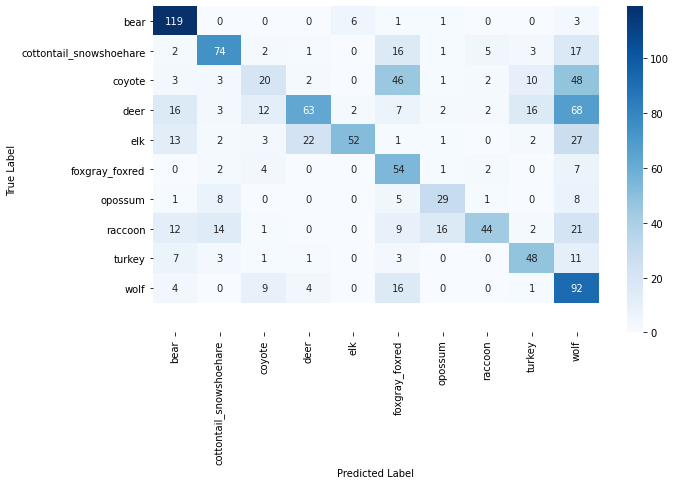

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

index = class_names
columns = class_names

cm = confusion_matrix(test_actuals, test_preds)
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize = (10,6))
ax = sns.heatmap(cm_df, annot = True, fmt='d', cmap = "Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
#ax.get_ylim()
ax.set_ylim(11, 0)

### Top 3 Accuracy

In [19]:
comparison_df.head()

image_group_id                                        top_pred_3  \
0  SSWI000000019158997                                     {'None': 0.0}   
1  SSWI000000012863544                                     {'None': 0.0}   
2  SSWI000000015060930                                     {'None': 0.0}   
3  SSWI000000020163661  {'cottontail_snowshoehare': 0.41720232367515564}   
4  SSWI000000013549996                      {'deer': 0.8169369697570801}   

                                         top3_dict_3  \
0                                                 {}   
1                                                 {}   
2                     {'bear': '0.5193208456039429'}   
3  {'cottontail_snowshoehare': '0.417202323675155...   
4  {'coyote': '0.8594738841056824', 'deer': '0.81...   

                                        top_pred_4  \
0  {'cottontail_snowshoehare': 0.6963155269622803}   
1                   {'turkey': 0.8526954650878906}   
2           {'foxgray_foxred': 0.2720596492290497}   
3                   {'turkey': 0.8804661631584167}   
4                     {'wolf': 0.9886847138404846}   

                                         top3_dict_4  \
0  {'cottontail_snowshoehare': '0.696315526962280...   
1  {'turkey': '0.8526954650878906', 'wolf': '0.12...   
2  {'elk': '0.4370231628417969', 'deer': '0.28611...   
3  {'turkey': '0.8804661631584167', 'wolf': '0.09...   
4  {'wolf': '0.9886847138404846', 'coyote': '0.03...   

                                  topk_conf_3_scaled  \
0                                                 {}   
1                                                 {}   
2                       {'bear': 0.6231850147247314}   
3  {'cottontail_snowshoehare': 0.5006427884101867...   
4       {'coyote': 0.99, 'deer': 0.9803243637084961}   

                                  topk_conf_4_scaled  \
0  {'cottontail_snowshoehare': 0.5802629391352336...   
1  {'turkey': 0.7105795542399089, 'wolf': 0.10510...   
2  {'elk': 0.36418596903483075, 'deer': 0.2384258...   
3  {'turkey': 0.733721802632014, 'wolf': 0.076691...   
4  {'wolf': 0.8239039282004039, 'coyote': 0.03056...   

                               event_final_topk_conf         event_final_pred  \
0  {'cottontail_snowshoehare': 0.5802629391352336...  cottontail_snowshoehare   
1  {'turkey': 0.7105795542399089, 'wolf': 0.10510...                   turkey   
2  {'bear': 0.6231850147247314, 'elk': 0.36418596...                     bear   
3  {'turkey': 0.733721802632014, 'cottontail_snow...                   turkey   
4  {'coyote': 0.99, 'deer': 0.9803243637084961, '...                   coyote   

   event_final_pred_conf  Unnamed: 0           TRIGGER_ID  CLASS_SPECIES  \
0               0.580263         701  SSWI000000019158997  Snowshoe Hare   
1               0.710580         200  SSWI000000012863544         Turkey   
2               0.623185         282  SSWI000000015060930            Elk   
3               0.733722         986  SSWI000000020163661           Deer   
4               0.990000         224  SSWI000000013549996           Wolf   

   Total   CLASS_SPECIES_RESTATED  
0      1  cottontail_snowshoehare  
1      1                   turkey  
2      1                      elk  
3      1                     deer  
4      1                     wolf

In [20]:
def check_species_present(x,y):
  if x in y:
    return 1
  else:
    return 0

comparison_df['top3_present'] = comparison_df.apply(lambda x: check_species_present(x.CLASS_SPECIES_RESTATED, x.event_final_topk_conf), axis=1)

In [21]:
def confirm_top3_species(x, y, z):
  if x == 1:
    ## return top5 pred, which is the true label
    return y
  else:
    ## return top1 pred (probably incorrect pred)
    return z

comparison_df['top3_species_pred'] = comparison_df.apply(lambda x: confirm_top3_species(x.top3_present, x.CLASS_SPECIES_RESTATED, x.event_final_pred), axis=1)

In [22]:
test_actuals = comparison_df['CLASS_SPECIES_RESTATED'].values
test_preds = comparison_df['top3_species_pred'].values

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_actuals, test_preds, labels=class_names)

array([[126,   0,   0,   0,   1,   1,   1,   0,   0,   1],
       [  1,  95,   2,   0,   0,   9,   1,   3,   3,   7],
       [  3,   1,  86,   0,   0,  22,   0,   0,   8,  15],
       [  8,   2,   6, 116,   1,   7,   2,   1,  12,  36],
       [  4,   2,   3,   7,  95,   1,   1,   0,   1,   9],
       [  0,   1,   1,   0,   0,  65,   0,   0,   0,   3],
       [  1,   3,   0,   0,   0,   2,  42,   0,   0,   4],
       [  5,   9,   0,   0,   0,   6,   5,  75,   2,  17],
       [  3,   1,   1,   1,   0,   0,   0,   0,  65,   3],
       [  1,   0,   2,   0,   0,   4,   0,   0,   0, 119]])

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_actuals, test_preds, digits = 4))

                         precision    recall  f1-score   support

                   bear     0.8289    0.9692    0.8936       130
cottontail_snowshoehare     0.8333    0.7851    0.8085       121
                 coyote     0.8515    0.6370    0.7288       135
                   deer     0.9355    0.6073    0.7365       191
                    elk     0.9794    0.7724    0.8636       123
         foxgray_foxred     0.5556    0.9286    0.6952        70
                opossum     0.8077    0.8077    0.8077        52
                raccoon     0.9494    0.6303    0.7576       119
                 turkey     0.7143    0.8784    0.7879        74
                   wolf     0.5561    0.9444    0.7000       126

               accuracy                         0.7748      1141
              macro avg     0.8012    0.7960    0.7779      1141
           weighted avg     0.8234    0.7748    0.7770      1141



(11.0, 0.0)

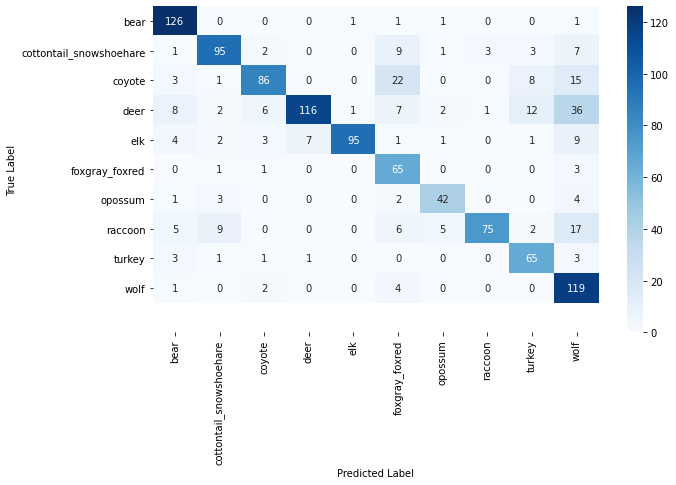

In [25]:
import seaborn as sns

index = class_names
columns = class_names

cm = confusion_matrix(test_actuals, test_preds)
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize = (10,6))
ax = sns.heatmap(cm_df, annot = True, fmt='d', cmap = "Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
#ax.get_ylim()
ax.set_ylim(11, 0)

## dataframe method (playground)

prioritize yolo classification <br>
fill out top3 classes with efficientnet <br>
(ignore bbox for now) <br>

In [26]:
## check for blank: SSWI000000005175003
## for playground: SSWI000000013549996
test_df = sample_input[sample_input['image_group_id'] == 'SSWI000000013549996']
test_df

Unnamed: 0  model_output_id  model_id       image_group_id image_id_1  \
15            15             5016         5  SSWI000000013549996          A   
1222        1222             3766         4  SSWI000000013549996          A   
1274        1274             2516         3  SSWI000000013549996          A   

           image_id_1_species_name  \
15                             NaN   
1222  wolf,coyote,deer,bear,turkey   
1274                          deer   

                                        image_id_1_conf  image_id_1_count  \
15                                                  NaN                 1   
1222  0.9680646061897278,0.02201225608587265,0.00935...                 0   
1274                                 0.7408024072647095                 1   

      image_id_1_blank  image_id_1_detectable  ... image_id_3  \
15               False                  False  ...          C   
1222             False                  False  ...          C   
1274             False                  False  ...          C   

          image_id_3_species_name  \
15                            NaN   
1222  wolf,coyote,deer,turkey,elk   
1274                         deer   

                                        image_id_3_conf  image_id_3_count  \
15                                                  NaN                 1   
1222  0.9619928002357483,0.03667626157402992,0.00088...                 0   
1274                                 0.8169369697570801                 1   

      image_id_3_blank  image_id_3_detectable   load_date  \
15               False                  False  2021-11-10   
1222             False                  False  2021-11-10   
1274             False                  False  2021-11-10   

                                        image_id_1_bbox  \
15                          0.8558,0.7205,0.2855,0.2616   
1222                                                NaN   
1274  0.8556231260299683,0.7097264528274536,0.288753...   

                                        image_id_2_bbox  \
15                           0.4317,0.6485,0.205,0.1656   
1222                                                NaN   
1274  0.4331307113170624,0.6443768739700317,0.209726...   

                                        image_id_3_bbox  
15                          0.4223,0.6498,0.1556,0.1678  
1222                                                NaN  
1274  0.424012154340744,0.6443768739700317,0.1671732...  

[3 rows x 26 columns]

In [27]:
df_model_id3 = test_df[test_df.model_id == 3]
df_model_id4 = test_df[test_df.model_id == 4]
df_model_id5 = test_df[test_df.model_id == 5]
df_model_id5 = df_model_id5[['image_group_id', 'image_id_1_bbox', 'image_id_2_bbox', 'image_id_3_bbox']]

In [28]:
"""
in any given event, there are 3 images with predictions
for each image, return a dictionary of species and confidence scores

ex:
{'bear': '0.15524305403232574',
 'deer': '0.148423969745636',
 'elk': '0.14720852673053741',
 'foxgray_foxred': '0.0765981450676918',
 'turkey': '0.32857051491737366'}
"""

import math
def create_species_conf_dict(x, y):
  if isinstance(x, float):
    pass
  else:
    species_list = list(x.split(","))
    conf_list = list(y.split(","))
    return dict(zip(species_list, conf_list))


df_model_id3['img1_species_conf_dict'] = df_model_id3.apply(lambda x: create_species_conf_dict(x.image_id_1_species_name, x.image_id_1_conf), axis=1)
df_model_id3['img2_species_conf_dict'] = df_model_id3.apply(lambda x: create_species_conf_dict(x.image_id_2_species_name, x.image_id_2_conf), axis=1)
df_model_id3['img3_species_conf_dict'] = df_model_id3.apply(lambda x: create_species_conf_dict(x.image_id_3_species_name, x.image_id_3_conf), axis=1)

df_model_id4['img1_species_conf_dict'] = df_model_id4.apply(lambda x: create_species_conf_dict(x.image_id_1_species_name, x.image_id_1_conf), axis=1)
df_model_id4['img2_species_conf_dict'] = df_model_id4.apply(lambda x: create_species_conf_dict(x.image_id_2_species_name, x.image_id_2_conf), axis=1)
df_model_id4['img3_species_conf_dict'] = df_model_id4.apply(lambda x: create_species_conf_dict(x.image_id_3_species_name, x.image_id_3_conf), axis=1)

# df_model_id4['img1_species_conf_dict'][1206]

In [29]:
df_model_id4

Unnamed: 0  model_output_id  model_id       image_group_id image_id_1  \
1222        1222             3766         4  SSWI000000013549996          A   

           image_id_1_species_name  \
1222  wolf,coyote,deer,bear,turkey   

                                        image_id_1_conf  image_id_1_count  \
1222  0.9680646061897278,0.02201225608587265,0.00935...                 0   

      image_id_1_blank  image_id_1_detectable  ... image_id_3_count  \
1222             False                  False  ...                0   

     image_id_3_blank image_id_3_detectable   load_date  image_id_1_bbox  \
1222            False                 False  2021-11-10              NaN   

      image_id_2_bbox image_id_3_bbox  \
1222              NaN             NaN   

                                 img1_species_conf_dict  \
1222  {'wolf': '0.9680646061897278', 'coyote': '0.02...   

                                 img2_species_conf_dict  \
1222  {'wolf': '0.9886847138404846', 'coyote': '0.01...   

                                 img3_species_conf_dict  
1222  {'wolf': '0.9619928002357483', 'coyote': '0.03...  

[1 rows x 29 columns]

In [30]:
"""
since there are 3 images in an event, each image has a dictionary
for each event, return a combined dictionary of species and list of confidence scores

ex:
{'bear': ['0.15524305403232574', '0.16207468509674072'],
 'coyote': ['0.04405967891216278', '0.050556182861328125'],
 'deer': ['0.148423969745636', '0.2770918905735016'],
 'elk': ['0.14720852673053741', '0.022372109815478325'],
 'foxgray_foxred': ['0.0765981450676918', '0.02164595201611519'],
 'raccoon': ['0.064368836581707'],
 'turkey': ['0.32857051491737366', '0.8158956170082092', '0.31233787536621094'],
 'wolf': ['0.06660380959510803']}
"""



## v2: outputs top1 predictions from each image in the event
def merge_species_conf_dict_top3(x, y, z):

  if x is None:
    x = {'None': 0}
  if y is None:
    y = {'None': 0}
  if z is None:
    z = {'None': 0}
    
  dict_list = [list(x.items())[0],list(y.items())[0],list(z.items())[0]]

  #print(dict_list)
  preds_dict = {}

  for item in dict_list:
    if item is None:
      pass
    else:
      if item[0] in preds_dict:
        preds_dict[item[0]].append(float(item[1]))
      else:
        preds_dict[item[0]] = [float(item[1])]

      
  return preds_dict

df_model_id3['consol_dict'] = df_model_id3.apply(lambda x: merge_species_conf_dict_top3(x.img1_species_conf_dict, x.img2_species_conf_dict, x.img3_species_conf_dict), axis=1)
df_model_id4['consol_dict'] = df_model_id4.apply(lambda x: merge_species_conf_dict_top3(x.img1_species_conf_dict, x.img2_species_conf_dict, x.img3_species_conf_dict), axis=1)

In [31]:
df_model_id4['consol_dict'][1222]

{'wolf': [0.9680646061897278, 0.9886847138404846, 0.9619928002357483]}

In [32]:
df_model_id3['consol_dict'][1274]

{'deer': [0.7408024072647095, 0.8169369697570801],
 'coyote': [0.8594738841056824]}

In [33]:
## case 3
dummy_dict = {
    'coyote': [0.5],
    'deer': [0.7],
    'bear': [0.65]
}

## case 1
dummy_dict = {
    'deer': ['0.7408024072647095', '0.8169369697570801', '0.5']
}

## case 2
dummy_dict = {
    'coyote': ['0.8594738841056824'],
    'deer': ['0.7408024072647095', '0.8169369697570801']
    }

In [34]:
def get_topk(x, k):
  topk_event_dict = {}
  top_ind = sorted(x, key=x.get, reverse=True)[:k]
  conf_scores = {}
  for i in top_ind:
    conf_scores[i] = max(x[i])
  
  return conf_scores

def get_pred_from_top3(consol_dict):

  ## if all 3 predictions are different classes, defer to class with highest confidence
  if len(consol_dict) == 3:
    return get_topk(consol_dict, 1)

  ## if there is an even number of predictions (2), defer to class with more appearances (has a longer list)
  elif len(consol_dict) == 2:
    max_key = max(consol_dict, key= lambda x: len(set(consol_dict[x])))
    return {max_key: max(consol_dict[max_key])}
  
  ## if there is only one class of predictions, return the class with highest confidence
  else:
    return get_topk(consol_dict, 1)

In [35]:
df_model_id3['top_pred'] = df_model_id3.apply(lambda x: get_pred_from_top3(x.consol_dict), axis=1)
df_model_id4['top_pred'] = df_model_id4.apply(lambda x: get_pred_from_top3(x.consol_dict), axis=1)

In [36]:
df_model_id3

Unnamed: 0  model_output_id  model_id       image_group_id image_id_1  \
1274        1274             2516         3  SSWI000000013549996          A   

     image_id_1_species_name     image_id_1_conf  image_id_1_count  \
1274                    deer  0.7408024072647095                 1   

      image_id_1_blank  image_id_1_detectable  ... image_id_3_detectable  \
1274             False                  False  ...                 False   

       load_date                                    image_id_1_bbox  \
1274  2021-11-10  0.8556231260299683,0.7097264528274536,0.288753...   

                                        image_id_2_bbox  \
1274  0.4331307113170624,0.6443768739700317,0.209726...   

                                        image_id_3_bbox  \
1274  0.424012154340744,0.6443768739700317,0.1671732...   

              img1_species_conf_dict            img2_species_conf_dict  \
1274  {'deer': '0.7408024072647095'}  {'coyote': '0.8594738841056824'}   

              img3_species_conf_dict  \
1274  {'deer': '0.8169369697570801'}   

                                            consol_dict  \
1274  {'deer': [0.7408024072647095, 0.81693696975708...   

                          top_pred  
1274  {'deer': 0.8169369697570801}  

[1 rows x 31 columns]

In [37]:
df_model_id4

Unnamed: 0  model_output_id  model_id       image_group_id image_id_1  \
1222        1222             3766         4  SSWI000000013549996          A   

           image_id_1_species_name  \
1222  wolf,coyote,deer,bear,turkey   

                                        image_id_1_conf  image_id_1_count  \
1222  0.9680646061897278,0.02201225608587265,0.00935...                 0   

      image_id_1_blank  image_id_1_detectable  ... image_id_3_detectable  \
1222             False                  False  ...                 False   

       load_date image_id_1_bbox  image_id_2_bbox  image_id_3_bbox  \
1222  2021-11-10             NaN              NaN              NaN   

                                 img1_species_conf_dict  \
1222  {'wolf': '0.9680646061897278', 'coyote': '0.02...   

                                 img2_species_conf_dict  \
1222  {'wolf': '0.9886847138404846', 'coyote': '0.01...   

                                 img3_species_conf_dict  \
1222  {'wolf': '0.9619928002357483', 'coyote': '0.03...   

                                            consol_dict  \
1222  {'wolf': [0.9680646061897278, 0.98868471384048...   

                          top_pred  
1222  {'wolf': 0.9886847138404846}  

[1 rows x 31 columns]

In [38]:
## generate top3_dict for each model

def merge_species_conf_dict(x, y, z):
  dict_list = [x,y,z]
  #print(dict_list)
  preds_dict = {}

  for item in dict_list:
    if item is None:
      pass
    else:
      for key, value in item.items():
        if key in preds_dict:
          preds_dict[key].append(value)
        else:
          preds_dict[key] = [value]
      
  return preds_dict

df_model_id3['top3_dict'] = df_model_id3.apply(lambda x: get_topk(merge_species_conf_dict(x.img1_species_conf_dict, x.img2_species_conf_dict, x.img3_species_conf_dict),3), axis=1)
df_model_id4['top3_dict'] = df_model_id4.apply(lambda x: get_topk(merge_species_conf_dict(x.img1_species_conf_dict, x.img2_species_conf_dict, x.img3_species_conf_dict),3), axis=1)

In [39]:
df_model_id3

Unnamed: 0  model_output_id  model_id       image_group_id image_id_1  \
1274        1274             2516         3  SSWI000000013549996          A   

     image_id_1_species_name     image_id_1_conf  image_id_1_count  \
1274                    deer  0.7408024072647095                 1   

      image_id_1_blank  image_id_1_detectable  ...   load_date  \
1274             False                  False  ...  2021-11-10   

                                        image_id_1_bbox  \
1274  0.8556231260299683,0.7097264528274536,0.288753...   

                                        image_id_2_bbox  \
1274  0.4331307113170624,0.6443768739700317,0.209726...   

                                        image_id_3_bbox  \
1274  0.424012154340744,0.6443768739700317,0.1671732...   

              img1_species_conf_dict            img2_species_conf_dict  \
1274  {'deer': '0.7408024072647095'}  {'coyote': '0.8594738841056824'}   

              img3_species_conf_dict  \
1274  {'deer': '0.8169369697570801'}   

                                            consol_dict  \
1274  {'deer': [0.7408024072647095, 0.81693696975708...   

                          top_pred  \
1274  {'deer': 0.8169369697570801}   

                                              top3_dict  
1274  {'coyote': '0.8594738841056824', 'deer': '0.81...  

[1 rows x 32 columns]

In [40]:
df_model_id4

Unnamed: 0  model_output_id  model_id       image_group_id image_id_1  \
1222        1222             3766         4  SSWI000000013549996          A   

           image_id_1_species_name  \
1222  wolf,coyote,deer,bear,turkey   

                                        image_id_1_conf  image_id_1_count  \
1222  0.9680646061897278,0.02201225608587265,0.00935...                 0   

      image_id_1_blank  image_id_1_detectable  ...   load_date  \
1222             False                  False  ...  2021-11-10   

     image_id_1_bbox image_id_2_bbox  image_id_3_bbox  \
1222             NaN             NaN              NaN   

                                 img1_species_conf_dict  \
1222  {'wolf': '0.9680646061897278', 'coyote': '0.02...   

                                 img2_species_conf_dict  \
1222  {'wolf': '0.9886847138404846', 'coyote': '0.01...   

                                 img3_species_conf_dict  \
1222  {'wolf': '0.9619928002357483', 'coyote': '0.03...   

                                            consol_dict  \
1222  {'wolf': [0.9680646061897278, 0.98868471384048...   

                          top_pred  \
1222  {'wolf': 0.9886847138404846}   

                                              top3_dict  
1222  {'wolf': '0.9886847138404846', 'coyote': '0.03...  

[1 rows x 32 columns]

In [41]:
"""
merge model_id3 and model_id4 at the event level
the final prediction dictionaries from both models can be on the same row
"""
df_merge = pd.merge(df_model_id3, df_model_id4, how='inner', on="image_group_id", suffixes=('_3', '_4'))
df_merge

Unnamed: 0_3  model_output_id_3  model_id_3       image_group_id  \
0          1274               2516           3  SSWI000000013549996   

  image_id_1_3 image_id_1_species_name_3   image_id_1_conf_3  \
0            A                      deer  0.7408024072647095   

   image_id_1_count_3  image_id_1_blank_3  image_id_1_detectable_3  ...  \
0                   1               False                    False  ...   

  load_date_4 image_id_1_bbox_4 image_id_2_bbox_4  image_id_3_bbox_4  \
0  2021-11-10               NaN               NaN                NaN   

                            img1_species_conf_dict_4  \
0  {'wolf': '0.9680646061897278', 'coyote': '0.02...   

                            img2_species_conf_dict_4  \
0  {'wolf': '0.9886847138404846', 'coyote': '0.01...   

                            img3_species_conf_dict_4  \
0  {'wolf': '0.9619928002357483', 'coyote': '0.03...   

                                       consol_dict_4  \
0  {'wolf': [0.9680646061897278, 0.98868471384048...   

                     top_pred_4  \
0  {'wolf': 0.9886847138404846}   

                                         top3_dict_4  
0  {'wolf': '0.9886847138404846', 'coyote': '0.03...  

[1 rows x 63 columns]

In [42]:
"""
clean-up columns
"""
df_merge = df_merge[['image_group_id', 'top_pred_3', 'top3_dict_3', 'top_pred_4', 'top3_dict_4']]
df_merge

image_group_id                    top_pred_3  \
0  SSWI000000013549996  {'deer': 0.8169369697570801}   

                                         top3_dict_3  \
0  {'coyote': '0.8594738841056824', 'deer': '0.81...   

                     top_pred_4  \
0  {'wolf': 0.9886847138404846}   

                                         top3_dict_4  
0  {'wolf': '0.9886847138404846', 'coyote': '0.03...

In [43]:
"""
before we combine scores, we should weight the predictions between model_id3 and model_id4
to slightly bias the scores towards model_id3

80/67 = 1.2

multiply topk_conf_3 by 1.2
divide topk_conf_4 by 1.2
"""

def scale_model_id3(x):
  ## x is a dictionary
  intermed_dict = {key: float(value) * 1.2 for key, value in x.items()}
  ## cap maximum possible score at 0.99
  output_dict = {key: (0.99 if float(value) > 1 else float(value)) for key, value in intermed_dict.items()}
  return output_dict

def scale_model_id4(x):
  ## x is a dictionary
  return {key: float(value) / 1.2 for key, value in x.items()}

df_merge['topk_conf_3_scaled'] = df_merge.apply(lambda x: scale_model_id3(x.top3_dict_3), axis=1)
df_merge['topk_conf_4_scaled'] = df_merge.apply(lambda x: scale_model_id4(x.top3_dict_4), axis=1)

In [44]:
df_merge

image_group_id                    top_pred_3  \
0  SSWI000000013549996  {'deer': 0.8169369697570801}   

                                         top3_dict_3  \
0  {'coyote': '0.8594738841056824', 'deer': '0.81...   

                     top_pred_4  \
0  {'wolf': 0.9886847138404846}   

                                         top3_dict_4  \
0  {'wolf': '0.9886847138404846', 'coyote': '0.03...   

                             topk_conf_3_scaled  \
0  {'coyote': 0.99, 'deer': 0.9803243637084961}   

                                  topk_conf_4_scaled  
0  {'wolf': 0.8239039282004039, 'coyote': 0.03056...

In [45]:
"""
output final topk dictionary of species predictions and their confidence scores
"""

def combine_topk_conf(x, y):
  dict_list = [x,y]
  #print(dict_list)
  preds_dict = {}

  for item in dict_list:
    if item is None:
      pass
    else:
      for key, value in item.items():
        if key in preds_dict:
          preds_dict[key].append(value)
        else:
          preds_dict[key] = [value]
      
  return preds_dict

def get_final_topk(x, k):
  topk_event_dict = {}
  top_ind = sorted(x, key=x.get, reverse=True)[:k]
  conf_scores = {}
  for i in top_ind:
    conf_scores[i] = max(x[i])
  
  return conf_scores

df_merge['event_final_topk_conf'] = df_merge.apply(lambda x: get_final_topk(combine_topk_conf(x.topk_conf_3_scaled, x.topk_conf_4_scaled),3), axis=1)
df_merge['event_final_topk_conf'][0]

{'coyote': 0.99, 'deer': 0.9803243637084961, 'wolf': 0.8239039282004039}

In [46]:
## confirm top3
print("{}\n{}".format(df_merge['topk_conf_4_scaled'][0], df_merge['topk_conf_3_scaled'][0]))

{'wolf': 0.8239039282004039, 'coyote': 0.030563551311691604, 'deer': 0.007793215724329154}
{'coyote': 0.99, 'deer': 0.9803243637084961}


In [47]:
df_merge

image_group_id                    top_pred_3  \
0  SSWI000000013549996  {'deer': 0.8169369697570801}   

                                         top3_dict_3  \
0  {'coyote': '0.8594738841056824', 'deer': '0.81...   

                     top_pred_4  \
0  {'wolf': 0.9886847138404846}   

                                         top3_dict_4  \
0  {'wolf': '0.9886847138404846', 'coyote': '0.03...   

                             topk_conf_3_scaled  \
0  {'coyote': 0.99, 'deer': 0.9803243637084961}   

                                  topk_conf_4_scaled  \
0  {'wolf': 0.8239039282004039, 'coyote': 0.03056...   

                               event_final_topk_conf  
0  {'coyote': 0.99, 'deer': 0.9803243637084961, '...

In [48]:
"""
output final event prediction, conf score, and bbox
"""
def output_final_pred_species(x):
  intermed_dict = {key: float(value) for key, value in x.items()}
  top_ind = sorted(intermed_dict, key=intermed_dict.get, reverse=True)[:1]
  #print(top_ind)
  return top_ind[0]

df_merge['event_final_pred'] = df_merge.apply(lambda x: output_final_pred_species(x.event_final_topk_conf), axis=1)
df_merge['event_final_pred_conf'] = df_merge.apply(lambda x: output_final_pred_conf(x.event_final_topk_conf), axis=1)
df_merge

image_group_id                    top_pred_3  \
0  SSWI000000013549996  {'deer': 0.8169369697570801}   

                                         top3_dict_3  \
0  {'coyote': '0.8594738841056824', 'deer': '0.81...   

                     top_pred_4  \
0  {'wolf': 0.9886847138404846}   

                                         top3_dict_4  \
0  {'wolf': '0.9886847138404846', 'coyote': '0.03...   

                             topk_conf_3_scaled  \
0  {'coyote': 0.99, 'deer': 0.9803243637084961}   

                                  topk_conf_4_scaled  \
0  {'wolf': 0.8239039282004039, 'coyote': 0.03056...   

                               event_final_topk_conf event_final_pred  \
0  {'coyote': 0.99, 'deer': 0.9803243637084961, '...           coyote   

   event_final_pred_conf  
0                   0.99

## ignore

In [49]:
### get top 5 for each event
"""
for each event, consolidate the combined dictionary to output a topk result by confidence scores

ex:
k = 5
{'bear': '0.16207468509674072',
 'deer': '0.2770918905735016',
 'elk': '0.14720852673053741',
 'foxgray_foxred': '0.0765981450676918',
 'turkey': '0.8158956170082092'}
"""

def get_topk(x, k):
  topk_event_dict = {}
  top_ind = sorted(x, key=x.get, reverse=True)[:k]
  conf_scores = {}
  for i in top_ind:
    conf_scores[i] = max(x[i])
  
  return conf_scores

df_model_id3['topk_conf'] = df_model_id3.apply(lambda x: get_topk(x.consol_dict, 5), axis=1)
df_model_id4['topk_conf'] = df_model_id4.apply(lambda x: get_topk(x.consol_dict, 5), axis=1)
#df_model_id4['topk_conf'][1206]

In [50]:
print(df_model_id3['topk_conf'][1274])
print(df_model_id4['topk_conf'][1222])

{'coyote': 0.8594738841056824, 'deer': 0.8169369697570801}
{'wolf': 0.9886847138404846}


In [51]:
"""
output final prediction based on highest confidence: class and corresponding confidence score
"""

def output_final_pred_species(x):
  intermed_dict = {key: float(value) for key, value in x.items()}
  top_ind = sorted(intermed_dict, key=intermed_dict.get, reverse=True)[:1]
  #print(top_ind)
  return top_ind[0]

def output_final_pred_conf(x):
  intermed_dict = {key: float(value) for key, value in x.items()}
  top_ind = sorted(intermed_dict, key=intermed_dict.get, reverse=True)[:1]
  #print(top_ind)
  return x[top_ind[0]]

df_model_id4['final_pred'] = df_model_id4.apply(lambda x: output_final_pred_species(x.topk_conf), axis=1)
df_model_id4['final_pred_conf'] = df_model_id4.apply(lambda x: output_final_pred_conf(x.topk_conf), axis=1)

df_model_id3['final_pred'] = df_model_id3.apply(lambda x: output_final_pred_species(x.topk_conf), axis=1)
df_model_id3['final_pred_conf'] = df_model_id3.apply(lambda x: output_final_pred_conf(x.topk_conf), axis=1)

df_model_id4

Unnamed: 0  model_output_id  model_id       image_group_id image_id_1  \
1222        1222             3766         4  SSWI000000013549996          A   

           image_id_1_species_name  \
1222  wolf,coyote,deer,bear,turkey   

                                        image_id_1_conf  image_id_1_count  \
1222  0.9680646061897278,0.02201225608587265,0.00935...                 0   

      image_id_1_blank  image_id_1_detectable  ... image_id_3_bbox  \
1222             False                  False  ...             NaN   

                                 img1_species_conf_dict  \
1222  {'wolf': '0.9680646061897278', 'coyote': '0.02...   

                                 img2_species_conf_dict  \
1222  {'wolf': '0.9886847138404846', 'coyote': '0.01...   

                                 img3_species_conf_dict  \
1222  {'wolf': '0.9619928002357483', 'coyote': '0.03...   

                                            consol_dict  \
1222  {'wolf': [0.9680646061897278, 0.98868471384048...   

                          top_pred  \
1222  {'wolf': 0.9886847138404846}   

                                              top3_dict  \
1222  {'wolf': '0.9886847138404846', 'coyote': '0.03...   

                         topk_conf final_pred  final_pred_conf  
1222  {'wolf': 0.9886847138404846}       wolf         0.988685  

[1 rows x 35 columns]

In [52]:
df_model_id3

Unnamed: 0  model_output_id  model_id       image_group_id image_id_1  \
1274        1274             2516         3  SSWI000000013549996          A   

     image_id_1_species_name     image_id_1_conf  image_id_1_count  \
1274                    deer  0.7408024072647095                 1   

      image_id_1_blank  image_id_1_detectable  ...  \
1274             False                  False  ...   

                                        image_id_3_bbox  \
1274  0.424012154340744,0.6443768739700317,0.1671732...   

              img1_species_conf_dict            img2_species_conf_dict  \
1274  {'deer': '0.7408024072647095'}  {'coyote': '0.8594738841056824'}   

              img3_species_conf_dict  \
1274  {'deer': '0.8169369697570801'}   

                                            consol_dict  \
1274  {'deer': [0.7408024072647095, 0.81693696975708...   

                          top_pred  \
1274  {'deer': 0.8169369697570801}   

                                              top3_dict  \
1274  {'coyote': '0.8594738841056824', 'deer': '0.81...   

                                              topk_conf final_pred  \
1274  {'coyote': 0.8594738841056824, 'deer': 0.81693...     coyote   

      final_pred_conf  
1274         0.859474  

[1 rows x 35 columns]

In [53]:
"""
based on the resulting class, get the corresponding bbox
"""

def get_bbox_imgNo(pred_class, pred_conf, img1_conf_dict, img2_conf_dict, img3_conf_dict):

  key, value = pred_class, pred_conf
  if key in img1_conf_dict and value == img1_conf_dict[key]:
    return "img1"
  elif key in img2_conf_dict and value == img2_conf_dict[key]:
    return "img2"
  else:
    return "img3"

def get_bbox(x, img1_bbox, img2_bbox, img3_bbox):
  if x == "img1":
    return img1_bbox
  elif x == "img2":
    return img2_bbox
  else:
    return img3_bbox

df_model_id3['bbox_img'] = df_model_id3.apply(lambda x: get_bbox(get_bbox_imgNo(x.final_pred, x.final_pred_conf, x.img1_species_conf_dict, x.img2_species_conf_dict,
                                                                        x.img3_species_conf_dict), x.image_id_1_bbox, x.image_id_2_bbox, x.image_id_3_bbox), axis=1)

df_model_id3

Unnamed: 0  model_output_id  model_id       image_group_id image_id_1  \
1274        1274             2516         3  SSWI000000013549996          A   

     image_id_1_species_name     image_id_1_conf  image_id_1_count  \
1274                    deer  0.7408024072647095                 1   

      image_id_1_blank  image_id_1_detectable  ...  \
1274             False                  False  ...   

              img1_species_conf_dict            img2_species_conf_dict  \
1274  {'deer': '0.7408024072647095'}  {'coyote': '0.8594738841056824'}   

              img3_species_conf_dict  \
1274  {'deer': '0.8169369697570801'}   

                                            consol_dict  \
1274  {'deer': [0.7408024072647095, 0.81693696975708...   

                          top_pred  \
1274  {'deer': 0.8169369697570801}   

                                              top3_dict  \
1274  {'coyote': '0.8594738841056824', 'deer': '0.81...   

                                              topk_conf final_pred  \
1274  {'coyote': 0.8594738841056824, 'deer': 0.81693...     coyote   

     final_pred_conf                                           bbox_img  
1274        0.859474  0.424012154340744,0.6443768739700317,0.1671732...  

[1 rows x 36 columns]

In [54]:
## join model_id4 with model_id5 first
df_model_id4 = pd.merge(df_model_id4, df_model_id5, how="inner", on="image_group_id", suffixes=('_4', '_5'))

df_model_id4['bbox_img'] = df_model_id4.apply(lambda x: get_bbox(get_bbox_imgNo(x.final_pred, x.final_pred_conf, x.img1_species_conf_dict, x.img2_species_conf_dict,
                                                                                x.img3_species_conf_dict), x.image_id_1_bbox_5, x.image_id_2_bbox_5, x.image_id_3_bbox_5), axis=1)

df_model_id4

Unnamed: 0  model_output_id  model_id       image_group_id image_id_1  \
0        1222             3766         4  SSWI000000013549996          A   

        image_id_1_species_name  \
0  wolf,coyote,deer,bear,turkey   

                                     image_id_1_conf  image_id_1_count  \
0  0.9680646061897278,0.02201225608587265,0.00935...                 0   

   image_id_1_blank  image_id_1_detectable  ...  \
0             False                  False  ...   

                                         consol_dict  \
0  {'wolf': [0.9680646061897278, 0.98868471384048...   

                       top_pred  \
0  {'wolf': 0.9886847138404846}   

                                           top3_dict  \
0  {'wolf': '0.9886847138404846', 'coyote': '0.03...   

                      topk_conf  final_pred  final_pred_conf  \
0  {'wolf': 0.9886847138404846}        wolf         0.988685   

             image_id_1_bbox_5           image_id_2_bbox_5  \
0  0.8558,0.7205,0.2855,0.2616  0.4317,0.6485,0.205,0.1656   

             image_id_3_bbox_5                     bbox_img  
0  0.4223,0.6498,0.1556,0.1678  0.4223,0.6498,0.1556,0.1678  

[1 rows x 39 columns]

In [55]:
"""
merge model_id3 and model_id4 at the event level
the final prediction dictionaries from both models can be on the same row
"""
df_merge = pd.merge(df_model_id3, df_model_id4, how='inner', on="image_group_id", suffixes=('_3', '_4'))
df_merge

Unnamed: 0_3  model_output_id_3  model_id_3       image_group_id  \
0          1274               2516           3  SSWI000000013549996   

  image_id_1_3 image_id_1_species_name_3   image_id_1_conf_3  \
0            A                      deer  0.7408024072647095   

   image_id_1_count_3  image_id_1_blank_3  image_id_1_detectable_3  ...  \
0                   1               False                    False  ...   

                                       consol_dict_4  \
0  {'wolf': [0.9680646061897278, 0.98868471384048...   

                     top_pred_4  \
0  {'wolf': 0.9886847138404846}   

                                         top3_dict_4  \
0  {'wolf': '0.9886847138404846', 'coyote': '0.03...   

                    topk_conf_4  final_pred_4  final_pred_conf_4  \
0  {'wolf': 0.9886847138404846}          wolf           0.988685   

             image_id_1_bbox_5           image_id_2_bbox_5  \
0  0.8558,0.7205,0.2855,0.2616  0.4317,0.6485,0.205,0.1656   

             image_id_3_bbox_5                   bbox_img_4  
0  0.4223,0.6498,0.1556,0.1678  0.4223,0.6498,0.1556,0.1678  

[1 rows x 74 columns]

In [56]:
df_merge

Unnamed: 0_3  model_output_id_3  model_id_3       image_group_id  \
0          1274               2516           3  SSWI000000013549996   

  image_id_1_3 image_id_1_species_name_3   image_id_1_conf_3  \
0            A                      deer  0.7408024072647095   

   image_id_1_count_3  image_id_1_blank_3  image_id_1_detectable_3  ...  \
0                   1               False                    False  ...   

                                       consol_dict_4  \
0  {'wolf': [0.9680646061897278, 0.98868471384048...   

                     top_pred_4  \
0  {'wolf': 0.9886847138404846}   

                                         top3_dict_4  \
0  {'wolf': '0.9886847138404846', 'coyote': '0.03...   

                    topk_conf_4  final_pred_4  final_pred_conf_4  \
0  {'wolf': 0.9886847138404846}          wolf           0.988685   

             image_id_1_bbox_5           image_id_2_bbox_5  \
0  0.8558,0.7205,0.2855,0.2616  0.4317,0.6485,0.205,0.1656   

             image_id_3_bbox_5                   bbox_img_4  
0  0.4223,0.6498,0.1556,0.1678  0.4223,0.6498,0.1556,0.1678  

[1 rows x 74 columns]

In [57]:
"""
clean-up columns
"""
df_merge = df_merge[['image_group_id', 'image_id_1_bbox', 'image_id_2_bbox', 'image_id_3_bbox', 'topk_conf_3', 'final_pred_3', 'final_pred_conf_3', 
                     'img1_species_conf_dict_3', 'img2_species_conf_dict_3', 'img3_species_conf_dict_3', 
                     'image_id_1_bbox_4', 'image_id_2_bbox_4', 'image_id_3_bbox_4', 'topk_conf_4', 'final_pred_4', 'final_pred_conf_4',
                     'img1_species_conf_dict_4', 'img2_species_conf_dict_4', 'img3_species_conf_dict_4',
                     'image_id_1_bbox_5', 'image_id_2_bbox_5', 'image_id_3_bbox_5', 'bbox_img_4']]
df_merge = df_merge.rename(columns={'image_id_1_bbox':'image_id_1_bbox_3', 'image_id_2_bbox':'image_id_2_bbox_3', 'image_id_3_bbox':'image_id_3_bbox_3'})    
df_merge

image_group_id                                  image_id_1_bbox_3  \
0  SSWI000000013549996  0.8556231260299683,0.7097264528274536,0.288753...   

                                   image_id_2_bbox_3  \
0  0.4331307113170624,0.6443768739700317,0.209726...   

                                   image_id_3_bbox_3  \
0  0.424012154340744,0.6443768739700317,0.1671732...   

                                         topk_conf_3 final_pred_3  \
0  {'coyote': 0.8594738841056824, 'deer': 0.81693...       coyote   

   final_pred_conf_3        img1_species_conf_dict_3  \
0           0.859474  {'deer': '0.7408024072647095'}   

           img2_species_conf_dict_3        img3_species_conf_dict_3  ...  \
0  {'coyote': '0.8594738841056824'}  {'deer': '0.8169369697570801'}  ...   

                    topk_conf_4 final_pred_4 final_pred_conf_4  \
0  {'wolf': 0.9886847138404846}         wolf          0.988685   

                            img1_species_conf_dict_4  \
0  {'wolf': '0.9680646061897278', 'coyote': '0.02...   

                            img2_species_conf_dict_4  \
0  {'wolf': '0.9886847138404846', 'coyote': '0.01...   

                            img3_species_conf_dict_4  \
0  {'wolf': '0.9619928002357483', 'coyote': '0.03...   

             image_id_1_bbox_5           image_id_2_bbox_5  \
0  0.8558,0.7205,0.2855,0.2616  0.4317,0.6485,0.205,0.1656   

             image_id_3_bbox_5                   bbox_img_4  
0  0.4223,0.6498,0.1556,0.1678  0.4223,0.6498,0.1556,0.1678  

[1 rows x 23 columns]

In [58]:
# """
# cleanup columns
# """
# df_merge = df_merge.drop(columns=['Unnamed: 0_3','model_output_id_3', 'image_id_1_3', 'image_id_1_species_name_3', 'image_id_1_conf_3', 'image_id_1_count_3',
#                        'image_id_1_blank_3', 'image_id_1_detectable_3', 'image_id_2_3', 'image_id_2_species_name_3', 'image_id_2_conf_3',
#                        'image_id_2_count_3', 'image_id_2_blank_3', 'image_id_2_detectable_3', 'image_id_3_3', 'image_id_3_species_name_3',
#                        'image_id_3_conf_3', 'image_id_3_count_3', 'image_id_3_blank_3', 'image_id_3_detectable_3', 'load_date_3', 'img1_species_conf_dict_3',
#                        'img2_species_conf_dict_3', 'img3_species_conf_dict_3', 'consol_dict_3',
#                        'Unnamed: 0_4', 'model_output_id_4', 'image_id_1_4', 'image_id_1_species_name_4', 'image_id_1_conf_4', 'image_id_1_count_4',
#                        'image_id_1_blank_4', 'image_id_1_detectable_4', 'image_id_2_4', 'image_id_2_species_name_4', 'image_id_2_conf_4',
#                        'image_id_2_count_4', 'image_id_2_blank_4', 'image_id_2_detectable_4', 'image_id_3_4', 'image_id_3_species_name_4',
#                        'image_id_3_conf_4', 'image_id_3_count_4', 'image_id_3_blank_4', 'image_id_3_detectable_4', 'load_date_4', 'img1_species_conf_dict_4',
#                        'img2_species_conf_dict_4', 'img3_species_conf_dict_4', 'consol_dict_4'])
# df_merge

In [59]:
"""
before we combine scores, we should weight the predictions between model_id3 and model_id4
to slightly bias the scores towards model_id3

80/67 = 1.2

multiply topk_conf_3 by 1.2
divide topk_conf_4 by 1.2
"""

def scale_model_id3(x):
  ## x is a dictionary
  intermed_dict = {key: float(value) * 1.2 for key, value in x.items()}
  ## cap maximum possible score at 0.99
  output_dict = {key: (0.99 if float(value) > 1 else float(value)) for key, value in intermed_dict.items()}
  return output_dict

def scale_model_id4(x):
  ## x is a dictionary
  return {key: float(value) / 1.2 for key, value in x.items()}

df_merge['topk_conf_3_scaled'] = df_merge.apply(lambda x: scale_model_id3(x.topk_conf_3), axis=1)
df_merge['topk_conf_4_scaled'] = df_merge.apply(lambda x: scale_model_id4(x.topk_conf_4), axis=1)

In [60]:
"""
output final topk dictionary of species predictions and their confidence scores
"""

def combine_topk_conf(x, y):
  dict_list = [x,y]
  #print(dict_list)
  preds_dict = {}

  for item in dict_list:
    if item is None:
      pass
    else:
      for key, value in item.items():
        if key in preds_dict:
          preds_dict[key].append(value)
        else:
          preds_dict[key] = [value]
      
  return preds_dict

def get_final_topk(x, k):
  topk_event_dict = {}
  top_ind = sorted(x, key=x.get, reverse=True)[:k]
  conf_scores = {}
  for i in top_ind:
    conf_scores[i] = max(x[i])
  
  return conf_scores

df_merge['event_final_topk_conf'] = df_merge.apply(lambda x: get_final_topk(combine_topk_conf(x.topk_conf_3_scaled, x.topk_conf_4_scaled),3), axis=1)
df_merge['event_final_topk_conf'][0]

{'coyote': 0.99, 'deer': 0.9803243637084961, 'wolf': 0.8239039282004039}

In [61]:
## confirm top3
print("{}\n{}".format(df_merge['topk_conf_4_scaled'][0], df_merge['topk_conf_3_scaled'][0]))

{'wolf': 0.8239039282004039}
{'coyote': 0.99, 'deer': 0.9803243637084961}


In [62]:
df_merge

image_group_id                                  image_id_1_bbox_3  \
0  SSWI000000013549996  0.8556231260299683,0.7097264528274536,0.288753...   

                                   image_id_2_bbox_3  \
0  0.4331307113170624,0.6443768739700317,0.209726...   

                                   image_id_3_bbox_3  \
0  0.424012154340744,0.6443768739700317,0.1671732...   

                                         topk_conf_3 final_pred_3  \
0  {'coyote': 0.8594738841056824, 'deer': 0.81693...       coyote   

   final_pred_conf_3        img1_species_conf_dict_3  \
0           0.859474  {'deer': '0.7408024072647095'}   

           img2_species_conf_dict_3        img3_species_conf_dict_3  ...  \
0  {'coyote': '0.8594738841056824'}  {'deer': '0.8169369697570801'}  ...   

                            img1_species_conf_dict_4  \
0  {'wolf': '0.9680646061897278', 'coyote': '0.02...   

                            img2_species_conf_dict_4  \
0  {'wolf': '0.9886847138404846', 'coyote': '0.01...   

                            img3_species_conf_dict_4  \
0  {'wolf': '0.9619928002357483', 'coyote': '0.03...   

             image_id_1_bbox_5           image_id_2_bbox_5  \
0  0.8558,0.7205,0.2855,0.2616  0.4317,0.6485,0.205,0.1656   

             image_id_3_bbox_5                   bbox_img_4  \
0  0.4223,0.6498,0.1556,0.1678  0.4223,0.6498,0.1556,0.1678   

                             topk_conf_3_scaled            topk_conf_4_scaled  \
0  {'coyote': 0.99, 'deer': 0.9803243637084961}  {'wolf': 0.8239039282004039}   

                               event_final_topk_conf  
0  {'coyote': 0.99, 'deer': 0.9803243637084961, '...  

[1 rows x 26 columns]

In [63]:
"""
output final event prediction, conf score, and bbox
"""
def output_final_pred_species(x):
  intermed_dict = {key: float(value) for key, value in x.items()}
  top_ind = sorted(intermed_dict, key=intermed_dict.get, reverse=True)[:1]
  #print(top_ind)
  return top_ind[0]

def get_bbox_imgNo(pred_class, pred_conf, img1_conf_dict, img2_conf_dict, img3_conf_dict):

  key, value = pred_class, pred_conf
  if key in img1_conf_dict and value == img1_conf_dict[key]:
    return "img1"
  elif key in img2_conf_dict and value == img2_conf_dict[key]:
    return "img2"
  else:
    return "img3"

def get_bbox(x, img1_bbox, img2_bbox, img3_bbox):
  if x == "img1":
    return img1_bbox
  elif x == "img2":
    return img2_bbox
  else:
    return img3_bbox

df_merge['event_final_pred'] = df_merge.apply(lambda x: output_final_pred_species(x.event_final_topk_conf), axis=1)
df_merge['event_final_pred_conf'] = df_merge.apply(lambda x: output_final_pred_conf(x.event_final_topk_conf), axis=1)
df_merge

image_group_id                                  image_id_1_bbox_3  \
0  SSWI000000013549996  0.8556231260299683,0.7097264528274536,0.288753...   

                                   image_id_2_bbox_3  \
0  0.4331307113170624,0.6443768739700317,0.209726...   

                                   image_id_3_bbox_3  \
0  0.424012154340744,0.6443768739700317,0.1671732...   

                                         topk_conf_3 final_pred_3  \
0  {'coyote': 0.8594738841056824, 'deer': 0.81693...       coyote   

   final_pred_conf_3        img1_species_conf_dict_3  \
0           0.859474  {'deer': '0.7408024072647095'}   

           img2_species_conf_dict_3        img3_species_conf_dict_3  ...  \
0  {'coyote': '0.8594738841056824'}  {'deer': '0.8169369697570801'}  ...   

                            img3_species_conf_dict_4  \
0  {'wolf': '0.9619928002357483', 'coyote': '0.03...   

             image_id_1_bbox_5           image_id_2_bbox_5  \
0  0.8558,0.7205,0.2855,0.2616  0.4317,0.6485,0.205,0.1656   

             image_id_3_bbox_5                   bbox_img_4  \
0  0.4223,0.6498,0.1556,0.1678  0.4223,0.6498,0.1556,0.1678   

                             topk_conf_3_scaled            topk_conf_4_scaled  \
0  {'coyote': 0.99, 'deer': 0.9803243637084961}  {'wolf': 0.8239039282004039}   

                               event_final_topk_conf event_final_pred  \
0  {'coyote': 0.99, 'deer': 0.9803243637084961, '...           coyote   

  event_final_pred_conf  
0                  0.99  

[1 rows x 28 columns]

In [64]:
dummy_dict = {"model3": "coyote"}
for k,v in dummy_dict.items():
  print(k)



from math import isclose
a = 1.0
b = 1.00000001
print(isclose(a, b, abs_tol=1e-8))

model3
True


In [65]:
def output_final_bbox_model(pred_class, pred_conf, topk_3_scaled, topk_4_scaled):
  key, value = pred_class, pred_conf
  if key in topk_3_scaled and value == topk_3_scaled[key]:
    return {"model3": [pred_class, pred_conf]}
  elif key in topk_4_scaled and value == topk_4_scaled[key]:
    return {"model4": [pred_class, pred_conf]}
  else:
    pass

def output_final_bbox_imgNo(name_dict, img1_model3_dict, img2_model3_dict, img3_model3_dict):
  key = None
  value = None
  for k,v in name_dict.items():
    key = k
    value = v

  if (value[0] in img1_model3_dict and float(value[1])/1.2 <= img1_model3_dict[value[0]]):
    return "img1"
  elif (value[0] in img2_model3_dict and float(value[1])/1.2 <= img2_model3_dict[value[0]]):
    return "img2"
  elif (value[0] in img3_model3_dict and float(value[1])/1.2 <= img3_model3_dict[value[0]]):
    return "img3"
  else:
    return "model4"

def output_final_bbox(name, img1_model3_bbox, img2_model3_bbox, img3_model3_bbox, model4_bbox):
  if name == "img1":
    return img1_model3_bbox
  elif name == "img2":
    return img2_model3_bbox
  elif name == "img3":
    return img3_model3_bbox
  else:
    return model4_bbox

df_merge['event_final_bbox'] = df_merge.apply(lambda x: output_final_bbox_imgNo(output_final_bbox_model(x.event_final_pred, x.event_final_pred_conf,
                                                                                                        x.topk_conf_3_scaled, x.topk_conf_4_scaled),
                                                                                x.img1_species_conf_dict_3, x.img2_species_conf_dict_3, x.img3_species_conf_dict_3), axis=1)
df_merge

TypeError: '<=' not supported between instances of 'float' and 'str'

In [66]:
df_merge['event_final_bbox'] = df_merge.apply(lambda x: output_final_bbox_model(x.event_final_pred, x.event_final_pred_conf, x.topk_conf_3_scaled, x.topk_conf_4_scaled), axis=1)
df_merge

image_group_id                                  image_id_1_bbox_3  \
0  SSWI000000013549996  0.8556231260299683,0.7097264528274536,0.288753...   

                                   image_id_2_bbox_3  \
0  0.4331307113170624,0.6443768739700317,0.209726...   

                                   image_id_3_bbox_3  \
0  0.424012154340744,0.6443768739700317,0.1671732...   

                                         topk_conf_3 final_pred_3  \
0  {'coyote': 0.8594738841056824, 'deer': 0.81693...       coyote   

   final_pred_conf_3        img1_species_conf_dict_3  \
0           0.859474  {'deer': '0.7408024072647095'}   

           img2_species_conf_dict_3        img3_species_conf_dict_3  ...  \
0  {'coyote': '0.8594738841056824'}  {'deer': '0.8169369697570801'}  ...   

             image_id_1_bbox_5           image_id_2_bbox_5  \
0  0.8558,0.7205,0.2855,0.2616  0.4317,0.6485,0.205,0.1656   

             image_id_3_bbox_5                   bbox_img_4  \
0  0.4223,0.6498,0.1556,0.1678  0.4223,0.6498,0.1556,0.1678   

                             topk_conf_3_scaled            topk_conf_4_scaled  \
0  {'coyote': 0.99, 'deer': 0.9803243637084961}  {'wolf': 0.8239039282004039}   

                               event_final_topk_conf event_final_pred  \
0  {'coyote': 0.99, 'deer': 0.9803243637084961, '...           coyote   

  event_final_pred_conf              event_final_bbox  
0                  0.99  {'model3': ['coyote', 0.99]}  

[1 rows x 29 columns]

to-do: scale model_id3 conf by 1.5 <br>
determine best bounding box

if model3, go with model3 bbox <br>
if model4, go with model5 (MD) bbox

event level: event_id, species class name, count, bounding boxes, top3 dict (species name: confidence)

## dictionary method [ignore]

In [ ]:
event_dict = {}

for index, row in test_df.iterrows():

  event_id = row['image_group_id']

  model_id = row['model_id']
  img1_result_class = row['image_id_1_species_name']
  img1_result_conf = row['image_id_1_conf']
  img1_result_count = row['image_id_1_count']
  img1_bbox = row['image_id_1_bbox']

  img2_result_class = row['image_id_2_species_name']
  img2_result_conf = row['image_id_2_conf']
  img2_result_count = row['image_id_2_count']
  img2_bbox = row['image_id_2_bbox']

  img3_result_class = row['image_id_3_species_name']
  img3_result_conf = row['image_id_3_conf']
  img3_result_count = row['image_id_3_count'] 
  img3_bbox = row['image_id_3_bbox']

  result_dict = {
        "model_id": model_id,
        "img1": {
            "pred_class": img1_result_class,
            "pred_conf": img1_result_conf,
            "pred_count": img1_result_count,
            "pred_bbox": img1_bbox
        },
        "img2": {
            "pred_class": img2_result_class,
            "pred_conf": img2_result_conf,
            "pred_count": img2_result_count,
            "pred_bbox": img2_bbox            
        },
        "img3": {
            "pred_class": img3_result_class,
            "pred_conf": img3_result_conf,
            "pred_count": img3_result_count,
            "pred_bbox": img3_bbox            
        }
    }
  

  if event_id in event_dict:
    event_dict[event_id].append(result_dict)
  else:
    event_dict[event_id] = [result_dict]

event_dict

{'SSWI000000019125218': [{'img1': {'pred_bbox': nan,
    'pred_class': nan,
    'pred_conf': nan,
    'pred_count': 0},
   'img2': {'pred_bbox': '0.8788,0.6067,0.2065,0.1463',
    'pred_class': nan,
    'pred_conf': nan,
    'pred_count': 1},
   'img3': {'pred_bbox': nan,
    'pred_class': nan,
    'pred_conf': nan,
    'pred_count': 0},
   'model_id': 5},
  {'img1': {'pred_bbox': nan,
    'pred_class': 'turkey,bear,deer,elk,foxgray_foxred',
    'pred_conf': '0.32857051491737366,0.15524305403232574,0.148423969745636,0.14720852673053741,0.0765981450676918',
    'pred_count': 0},
   'img2': {'pred_bbox': nan,
    'pred_class': 'turkey,wolf,coyote,elk,foxgray_foxred',
    'pred_conf': '0.8158956170082092,0.06660380959510803,0.04405967891216278,0.022372109815478325,0.02164595201611519',
    'pred_count': 0},
   'img3': {'pred_bbox': nan,
    'pred_class': 'turkey,deer,bear,raccoon,coyote',
    'pred_conf': '0.31233787536621094,0.2770918905735016,0.16207468509674072,0.064368836581707,0.0505

#### playground

In [ ]:
import pandas as pd
model_results = pd.read_json('/content/gdrive/My Drive/Colab Notebooks/w210_capstone/JSON_outputs/phase2_efficientnetb5_classifications_exclude_Wolf.json')
df = model_results['phase2_classification_results'].apply(pd.Series)
df['event_id'] = df['id'].str.split('.jpg').str[0]
df['event_id'] = df['event_id'].str[:-1]

In [ ]:
## for index, row in df.iloc[:5].iterrows():
preds_dict = {}
for index, row in df.iloc[:5].iterrows():
  event_id = str(row['event_id'])
  conf_dict = row['conf_dict']
  
  result_dict = {
        "conf_dict": conf_dict
    }
  
  if event_id in preds_dict:
    preds_dict[event_id].append(result_dict)
  else:
    preds_dict[event_id] = [result_dict]

preds_dict

{'SSWI000000018696587': [{'conf_dict': {'0': [0.984815597534179],
    '1': [0.0006901166634630001],
    '5': [0.000570110452827],
    '6': [0.000864675734192],
    '7': [0.012593532912433002]}},
  {'conf_dict': {'0': [0.99616539478302],
    '1': [0.00021788691810700002],
    '3': [0.000203496572794],
    '6': [0.00040631039883],
    '7': [0.0026421239599580004]}},
  {'conf_dict': {'0': [0.98821347951889],
    '2': [0.000333709089318],
    '5': [0.0008325020316980001],
    '6': [0.0016884513897820002],
    '7': [0.008449412882328]}}],
 'SSWI000000018741710': [{'conf_dict': {'0': [0.9460017681121821],
    '2': [0.000399870128603],
    '5': [0.001346027012914],
    '6': [0.022270414978265003],
    '7': [0.02964262664318]}},
  {'conf_dict': {'0': [0.27309530973434404],
    '2': [0.018853003159165],
    '5': [0.255657702684402],
    '6': [0.17894247174263],
    '7': [0.257040947675704]}}]}

In [ ]:
consol_dict = {}
for item, list_dict in preds_dict.items():
  itr = 0
  length = len(list_dict)
  event_id = item
  while itr < length:
    for k,v in list_dict[itr].items():
      #print(k, v)
      if event_id in consol_dict:
        consol_dict[event_id].append(v)
      else:
        consol_dict[event_id] = [v]
      #consol_dict.setdefault(k, []).append(v)
      itr +=1

consol_dict

{'SSWI000000018696587': [{'0': [0.984815597534179],
   '1': [0.0006901166634630001],
   '5': [0.000570110452827],
   '6': [0.000864675734192],
   '7': [0.012593532912433002]},
  {'0': [0.99616539478302],
   '1': [0.00021788691810700002],
   '3': [0.000203496572794],
   '6': [0.00040631039883],
   '7': [0.0026421239599580004]},
  {'0': [0.98821347951889],
   '2': [0.000333709089318],
   '5': [0.0008325020316980001],
   '6': [0.0016884513897820002],
   '7': [0.008449412882328]}],
 'SSWI000000018741710': [{'0': [0.9460017681121821],
   '2': [0.000399870128603],
   '5': [0.001346027012914],
   '6': [0.022270414978265003],
   '7': [0.02964262664318]},
  {'0': [0.27309530973434404],
   '2': [0.018853003159165],
   '5': [0.255657702684402],
   '6': [0.17894247174263],
   '7': [0.257040947675704]}]}

In [ ]:
outer_dict = {}
for key, value in consol_dict.items():
  intermed_dict = {}
  for sub_dict in value:
    for k,v in sub_dict.items():
      if k in intermed_dict:
        intermed_dict[k].append(v[0])
      else:
        intermed_dict[k] = [v[0]]
      outer_dict[key] = intermed_dict

outer_dict

{'SSWI000000018696587': {'0': [0.984815597534179,
   0.99616539478302,
   0.98821347951889],
  '1': [0.0006901166634630001, 0.00021788691810700002],
  '2': [0.000333709089318],
  '3': [0.000203496572794],
  '5': [0.000570110452827, 0.0008325020316980001],
  '6': [0.000864675734192, 0.00040631039883, 0.0016884513897820002],
  '7': [0.012593532912433002, 0.0026421239599580004, 0.008449412882328]},
 'SSWI000000018741710': {'0': [0.9460017681121821, 0.27309530973434404],
  '2': [0.000399870128603, 0.018853003159165],
  '5': [0.001346027012914, 0.255657702684402],
  '6': [0.022270414978265003, 0.17894247174263],
  '7': [0.02964262664318, 0.257040947675704]}}

In [ ]:
### get top 5 for each event
final_top5_event_dict = {}
for key, value in outer_dict.items():
  top_ind = sorted(value, key=value.get, reverse=True)[:5]
  conf_scores = {}
  for i in top_ind:
    conf_scores[i] = max(value[i])
  
  final_top5_event_dict[key] = conf_scores

final_top5_event_dict

{'SSWI000000018696587': {'0': 0.99616539478302,
  '1': 0.0006901166634630001,
  '5': 0.0008325020316980001,
  '6': 0.0016884513897820002,
  '7': 0.012593532912433002},
 'SSWI000000018741710': {'0': 0.9460017681121821,
  '2': 0.018853003159165,
  '5': 0.255657702684402,
  '6': 0.17894247174263,
  '7': 0.257040947675704}}

### continuing

In [ ]:
## consolidate predictions from models 3 and 4
"""
'SSWI000000018696587': [{'0': [0.984815597534179],
   '1': [0.0006901166634630001],
   '5': [0.000570110452827],
   '6': [0.000864675734192],
   '7': [0.012593532912433002]},
  {'0': [0.99616539478302],
   '1': [0.00021788691810700002],
   '3': [0.000203496572794],
   '6': [0.00040631039883],
   '7': [0.0026421239599580004]},
  {'0': [0.98821347951889],
   '2': [0.000333709089318],
   '5': [0.0008325020316980001],
   '6': [0.0016884513897820002],
   '7': [0.008449412882328]}]
"""

consol_dict = {}

for item, list_dict in event_dict.items():
  itr = 0
  intermediate_dict = list_dict
  #print(intermediate_dict)
  event_id = item
  length = len(intermediate_dict)
  while itr < length:
    for k,v in intermediate_dict[itr].items():
      print(k,v)
      if k=="model_id" and v==5:
        continue
      else:
        if 'img' in k:
          if event_id in consol_dict:
            consol_dict[event_id].append(v)
          else:
            consol_dict[event_id] = [v]

    itr +=1


consol_dict

  # itr = 0
  # length = len(list_dict)
  # print(length)
  # event_id = item
  # while itr < length:
  #   for k,v in list_dict[itr].items():
  #     #print(k, v)
  #     if event_id in consol_dict:
  #       consol_dict[event_id].append(v)
  #     else:
  #       consol_dict[event_id] = [v]
  #     #consol_dict.setdefault(k, []).append(v)
  #     itr +=1


model_id 5
img1 {'pred_class': nan, 'pred_conf': nan, 'pred_count': 0, 'pred_bbox': nan}
img2 {'pred_class': nan, 'pred_conf': nan, 'pred_count': 1, 'pred_bbox': '0.8788,0.6067,0.2065,0.1463'}
img3 {'pred_class': nan, 'pred_conf': nan, 'pred_count': 0, 'pred_bbox': nan}
model_id 4
img1 {'pred_class': 'turkey,bear,deer,elk,foxgray_foxred', 'pred_conf': '0.32857051491737366,0.15524305403232574,0.148423969745636,0.14720852673053741,0.0765981450676918', 'pred_count': 0, 'pred_bbox': nan}
img2 {'pred_class': 'turkey,wolf,coyote,elk,foxgray_foxred', 'pred_conf': '0.8158956170082092,0.06660380959510803,0.04405967891216278,0.022372109815478325,0.02164595201611519', 'pred_count': 0, 'pred_bbox': nan}
img3 {'pred_class': 'turkey,deer,bear,raccoon,coyote', 'pred_conf': '0.31233787536621094,0.2770918905735016,0.16207468509674072,0.064368836581707,0.050556182861328125', 'pred_count': 0, 'pred_bbox': nan}
model_id 3
img1 {'pred_class': nan, 'pred_conf': nan, 'pred_count': 0, 'pred_bbox': nan}
img2 {

{'SSWI000000019125218': [{'pred_bbox': nan,
   'pred_class': nan,
   'pred_conf': nan,
   'pred_count': 0},
  {'pred_bbox': '0.8788,0.6067,0.2065,0.1463',
   'pred_class': nan,
   'pred_conf': nan,
   'pred_count': 1},
  {'pred_bbox': nan, 'pred_class': nan, 'pred_conf': nan, 'pred_count': 0},
  {'pred_bbox': nan,
   'pred_class': 'turkey,bear,deer,elk,foxgray_foxred',
   'pred_conf': '0.32857051491737366,0.15524305403232574,0.148423969745636,0.14720852673053741,0.0765981450676918',
   'pred_count': 0},
  {'pred_bbox': nan,
   'pred_class': 'turkey,wolf,coyote,elk,foxgray_foxred',
   'pred_conf': '0.8158956170082092,0.06660380959510803,0.04405967891216278,0.022372109815478325,0.02164595201611519',
   'pred_count': 0},
  {'pred_bbox': nan,
   'pred_class': 'turkey,deer,bear,raccoon,coyote',
   'pred_conf': '0.31233787536621094,0.2770918905735016,0.16207468509674072,0.064368836581707,0.050556182861328125',
   'pred_count': 0},
  {'pred_bbox': nan, 'pred_class': nan, 'pred_conf': nan, 'pr